## Description of data

TASK: Predicting whether income exceeds 50K/yr based on census data. 
 - This dataset named “adult.csv” is found in the UCI machine learning repository
 - An individual’s annual income results from various factors. 
 - Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
df.isnull().sum().sum()

0

In [8]:
duplicated = df.duplicated()
sum(duplicated)

52

In [9]:
df.drop_duplicates(inplace= True)
df.shape

(48790, 15)

In [10]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

## Basic statistics

In [11]:
## Checking the value count of workclass column 

df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [13]:
df['marital-status'].value_counts()

Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [14]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [15]:
df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [16]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [17]:
df['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [18]:
df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

In [19]:
df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

## Univariate Analysis

In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

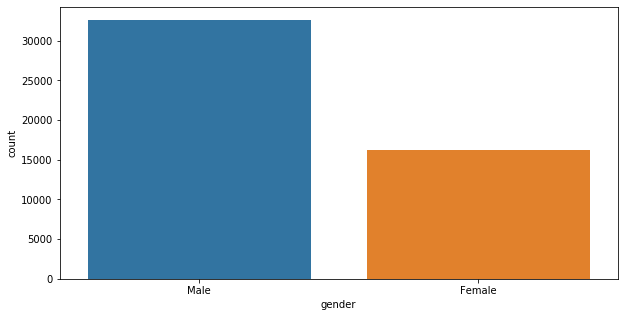

In [21]:
# Count plot for Gender

plt.figure(figsize=(10,5))
ax = sns.countplot(df['gender'])

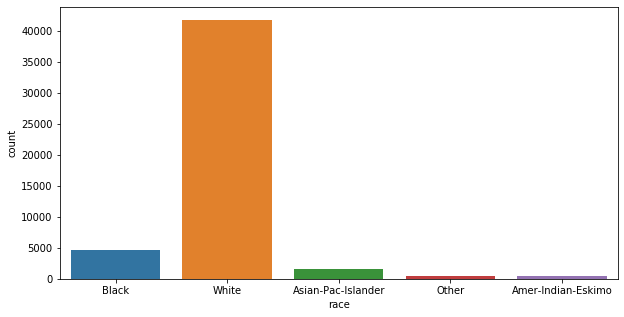

In [22]:
# Count plot for Gender

plt.figure(figsize=(10,5))
ax = sns.countplot(df['race'])

## Bivariate Analysis

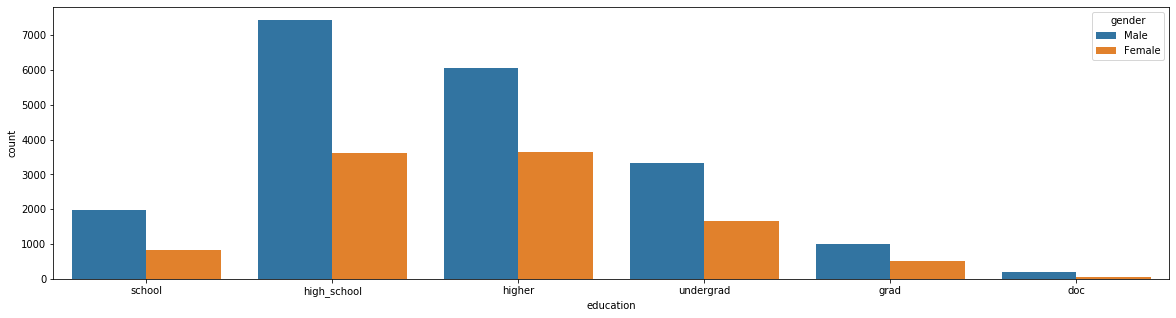

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(df['education'],hue='gender',data=df)

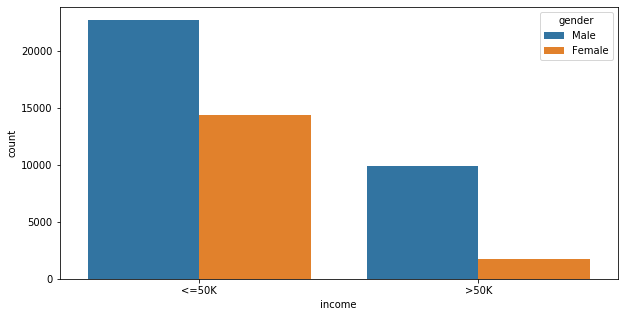

In [24]:
plt.figure(figsize=(10,5))
sns.countplot('income', hue = 'gender', data=df)

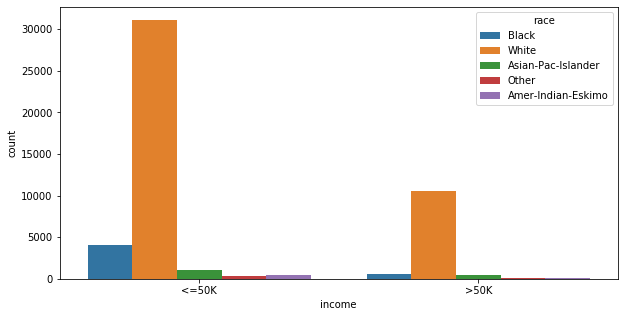

In [25]:
plt.figure(figsize=(10,5))
sns.countplot('income', hue = 'race', data=df)

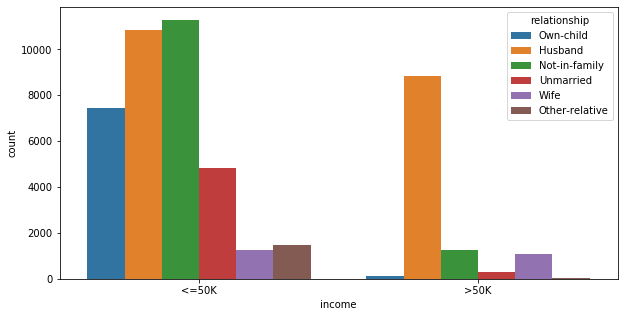

In [26]:
plt.figure(figsize=(10,5))
sns.countplot('income', hue = 'relationship', data=df)

## Replace ? with mode

In [27]:
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-speciality')
df['native-country'] = df['native-country'].replace('?', 'United-States')

In [28]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-speciality,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-speciality,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Feature Engineering

In [29]:
# Education Attribue

df.education = df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('HS-grad','high_school')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education = df.education.replace('Bachelors','undergrad')
df.education = df.education.replace('Masters','grad')
df.education = df.education.replace('Doctorate','doc')


In [30]:
# Marital status Attribute

df['marital-status']= df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status'] = df['marital-status'].replace('Never-married','single')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'others')

In [31]:
# Income Attribute

df.income = df.income.replace('<=50K',0)
df.income = df.income.replace('>50K',1)

In [32]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high_school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,higher,10,single,Prof-speciality,Own-child,White,Female,0,0,30,United-States,0


In [33]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223,0.230144
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521,-0.006309
educational-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915,0.332802
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152,0.223047
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431,0.147542
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000,0.227664
income,0.230144,-0.006309,0.332802,0.223047,0.147542,0.227664,1.000000


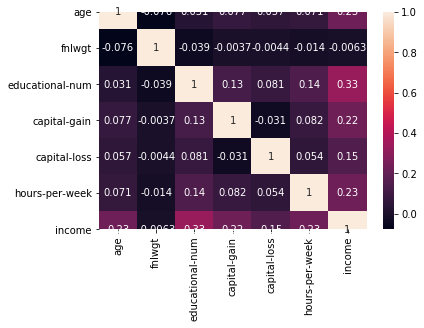

In [34]:
sns.heatmap(df.corr(),annot=True)

## Histogram Plot

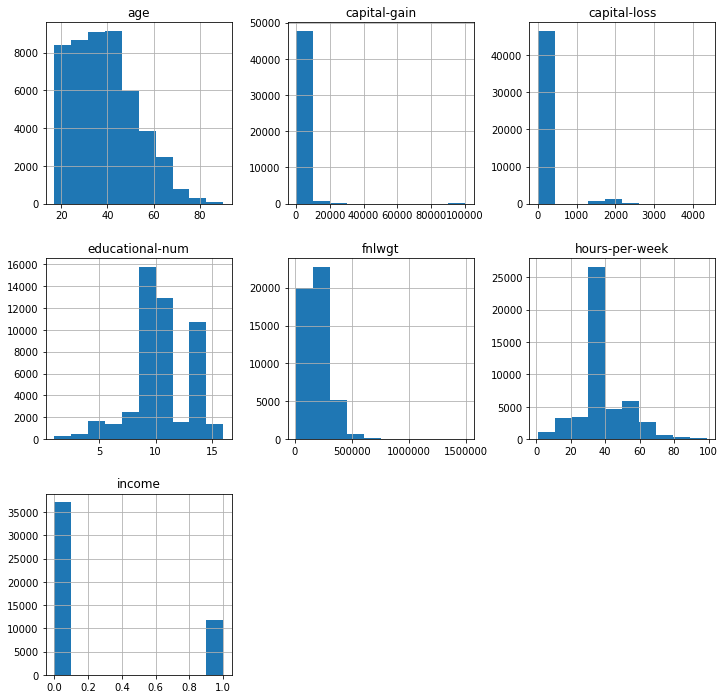

In [35]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

## Box-Plot to find outliers

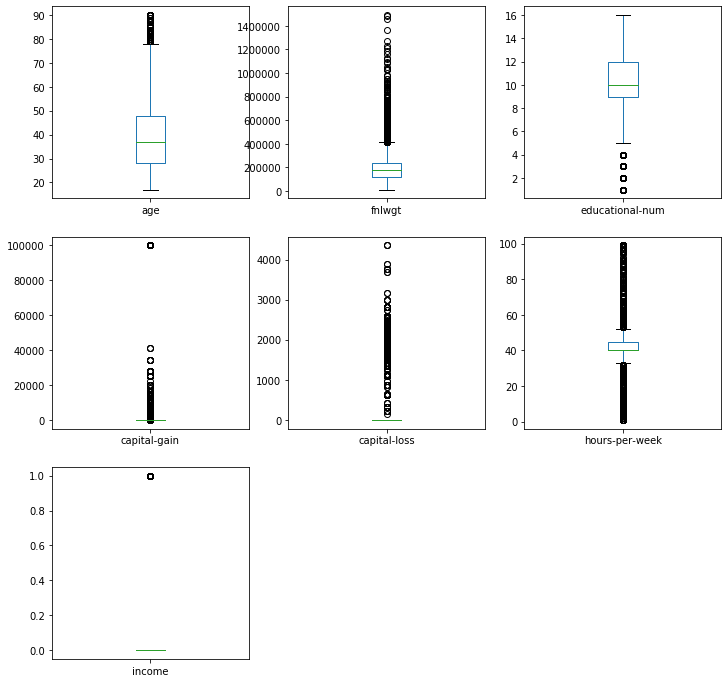

In [36]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

In [37]:
## Removing outliers

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
    
drop_outliers(df, 'age')
drop_outliers(df, 'fnlwgt')
drop_outliers(df, 'educational-num')
drop_outliers(df, 'capital-gain')
drop_outliers(df, 'capital-loss')
drop_outliers(df, 'hours-per-week')

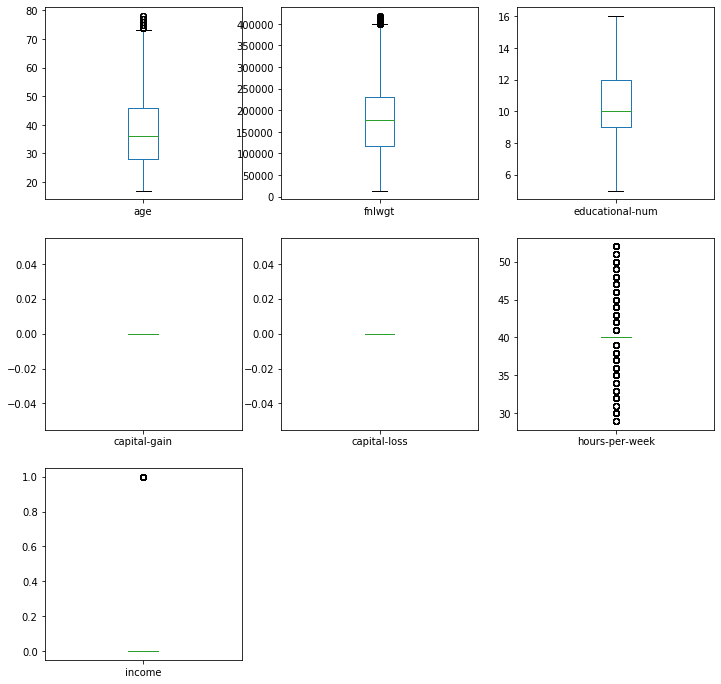

In [38]:
# After removing outliers
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

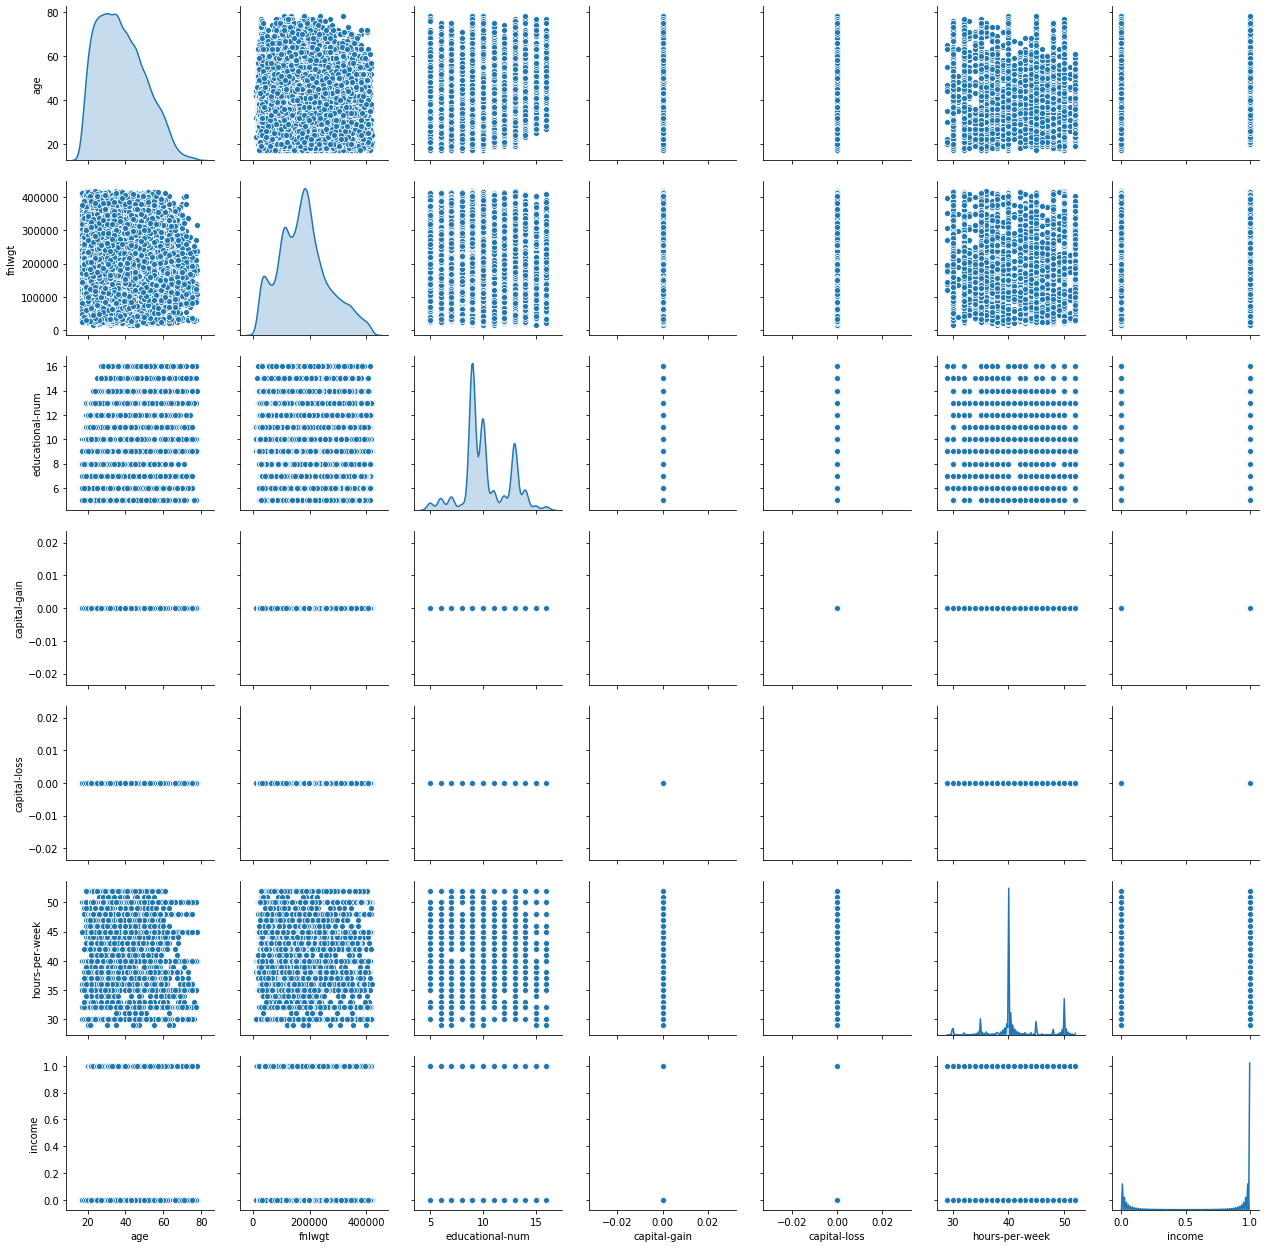

In [39]:
sns.pairplot(df, diag_kind='kde')

In [40]:
x = df.drop(['income'],axis = 1)
y = df['income']

In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [58]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3,14085,4,2,2,6,3,2,1,0,0,11,37,0
1,21,3,2955,2,4,0,4,0,4,1,0,0,21,37,0
2,11,1,18404,3,7,0,11,0,4,1,0,0,11,37,1
4,1,3,3807,3,5,2,9,3,4,0,0,0,1,37,0
5,17,3,11916,4,1,2,7,1,4,1,0,0,1,37,0


In [43]:
ss = StandardScaler().fit(df1.drop('income',axis=1))

In [44]:
X = ss.transform(df1.drop('income',axis=1))
y = df['income']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

## Model Building

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
## performing Logistic Regression to predict the model

logRegr = LogisticRegression()
logRegr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred =logRegr.predict(X_test)

In [49]:
from sklearn import metrics

print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.8417512857708032
Precision= 0.6860940695296524
Recall= 0.4290281329923274


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5712  307]
 [ 893  671]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6019
           1       0.69      0.43      0.53      1564

    accuracy                           0.84      7583
   macro avg       0.78      0.69      0.72      7583
weighted avg       0.83      0.84      0.83      7583



In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
## Performing the Random forest classifier 

rf = RandomForestClassifier(n_jobs=2,random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [53]:
from sklearn import metrics

print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.8242120532770671
Precision= 0.6047144152311876
Recall= 0.4264705882352941


In [54]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5583  436]
 [ 897  667]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6019
           1       0.60      0.43      0.50      1564

    accuracy                           0.82      7583
   macro avg       0.73      0.68      0.70      7583
weighted avg       0.81      0.82      0.81      7583



In [55]:
## Performing Gradient Boosting algorithm to improve the model performance

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.832915732559673

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=10,min_samples_leaf=12)
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)

In [57]:
print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.8413556639852301
Precision= 0.6552020636285468
Recall= 0.48721227621483376
